In [4]:
#first we wantto import the different libraries that would be used in this EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from PIL import Image

In [5]:
#import Data into Py
data=pd.read_csv('CardioGoodFitness.csv')
data.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


In [5]:
data.tail()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
175,TM798,40,Male,21,Single,6,5,83416,200
176,TM798,42,Male,18,Single,5,4,89641,200
177,TM798,45,Male,16,Single,5,5,90886,160
178,TM798,47,Male,18,Partnered,4,5,104581,120
179,TM798,48,Male,18,Partnered,4,5,95508,180


In [6]:
data.shape
#to get the total number of rows and columns, i want to see how much data i am working with.


(180, 9)

Observations;this tells me that there are 180 rows and 9 columns
data.shape

In [8]:
#to see how python is storing these variables.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [10]:
#to avoid any glitches during analysis. I have to check if there are any missing values in the data.

data.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

Observations;the output shows that there are no missing values in this data set

In [6]:
#to see the basic analysis of the data. provides a summary as represneted by various measures
data.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


Observations;

1. I can infer from the description of that data that the youngest customer is 18yrs old and that customers age range is between 18-50 yrs old with the average age being around 29yrs.
2. The mean of the Age of customers is close to the 75% percentile indicating a right skew
3. Amongst other variables described is also income: the highest income reported is 104k and lowest income is close to 30K.

# <span style="font-family: Arial; font-weight:bold;font-size:1.9em;color:#0e92ea">  Univariate Analysis

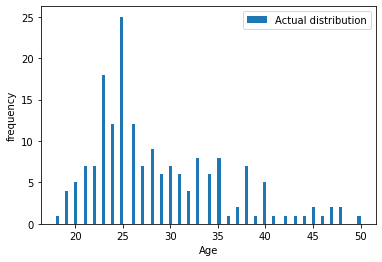

In [27]:
import scipy.stats as stats

#convert pandas DataFrame object to numpy array and sort
h = np.asarray(data['Age'])
h = sorted(h)
 
#use the scipy stats module to fit a normal distirbution with same mean and standard deviation
fit = stats.norm.pdf(h, np.mean(h), np.std(h)) 
 
#plot both series on the histogram
#plt.plot(h,fit,'-',linewidth = 2,label="Normal distribution with same mean and var")
plt.hist(h, bins=100, label="Actual distribution")      
plt.legend()
plt.xlabel("Age")
plt.ylabel("frequency")
plt.show()

Exploring numerical data first

In [11]:
def histogram_boxplot(feature, figsize=(8,6), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (5,3))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2
                                           sharex = True, 
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           )
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='red') 
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins) if bins else sns.distplot(feature, kde=False, ax=ax_hist2) 
    ax_hist2.axvline(np.mean(feature), color='g', linestyle='--') 
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') 

SyntaxError: invalid syntax (<ipython-input-11-d9d8dd72a320>, line 8)

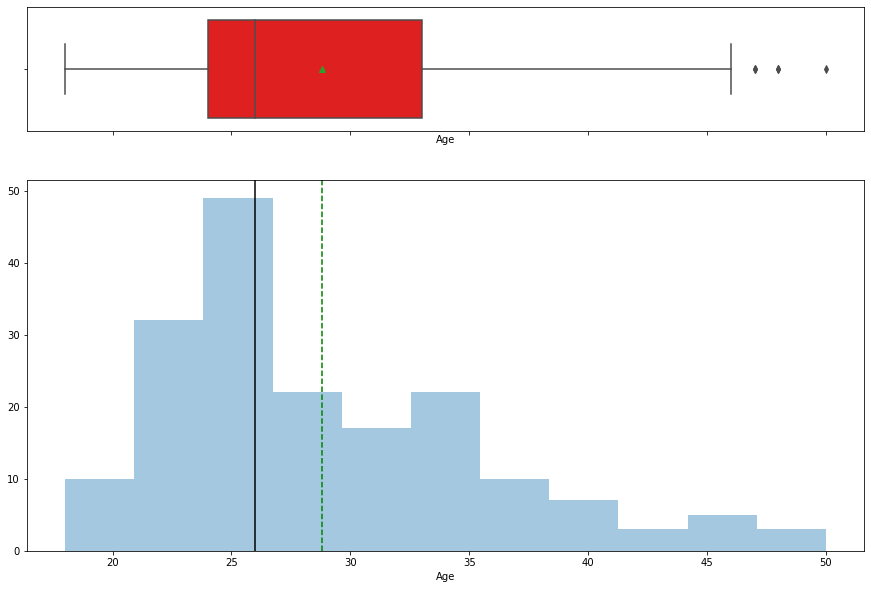

In [6]:
histogram_boxplot(data.Age)

**Observations**
1. the data is fairly distributed.
2. Majority of the customers are of a younger age group
3. A few outliers are recorded in this variable.



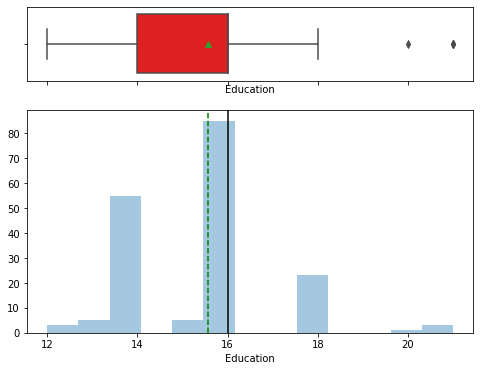

In [12]:
histogram_boxplot(data.Education)

**Observations**
1. the data is relatively left skewed.
2. 2 outliers were recorded
3. It appears that most of the customers have some sort of education.

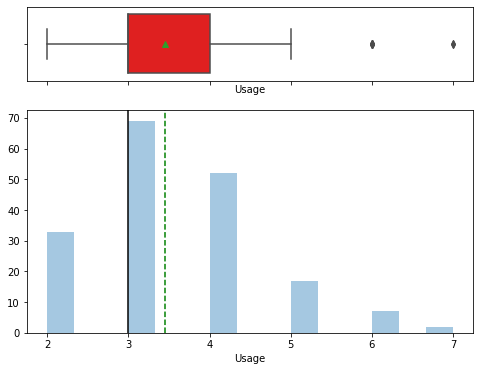

In [13]:
histogram_boxplot(data.Usage)

**Observations**
1. the data is fairly distributed.
2. Majority of the customers recorded a usage of 3.
3. A few outliers are recorded in this variable.


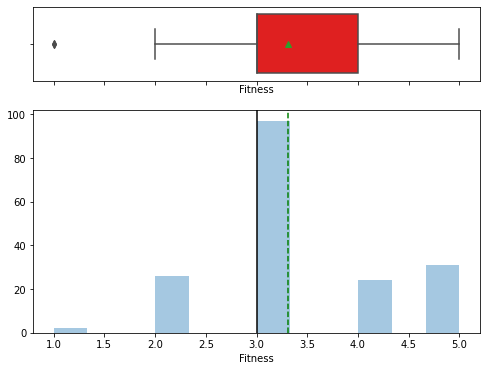

In [15]:
histogram_boxplot(data.Fitness)

**Observations**
1. the data is fairly distributed.
2. Majority of the customers recorded a fitness of 3.
3. No significant outliers are recorded in this variable.


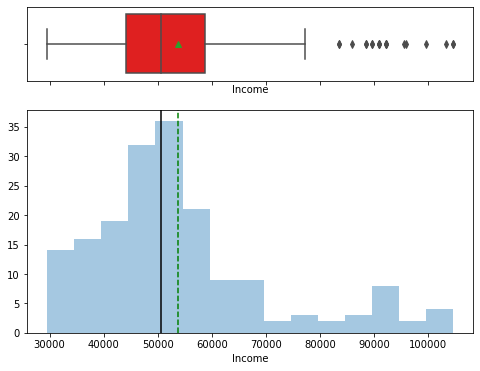

In [16]:
histogram_boxplot(data.Income)

**Observations**
1. the data is left skewed
2. Majority of the customers earn lower incomes 
3. A few outliers are recorded in this variables with a number of customers earning as high as 100k


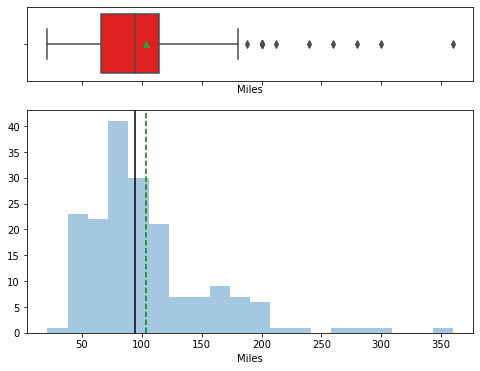

In [18]:
histogram_boxplot(data.Miles)

**Observations**
1. the data is left skewed
2. Majority of the customers ran lower miles. Average customers were expected to run around 100 miles.
3. A few outliers are recorded in this variables with a number miles expected of customers as high as 350


## Mean

In [7]:
print ("data:",data.mean())

data: Age             28.788889
Education       15.572222
Usage            3.455556
Fitness          3.311111
Income       53719.577778
Miles          103.194444
dtype: float64


## Mode

In [10]:
print (data['Age'].mode())

0    25
dtype: int64


## Median 

In [9]:
print ("data:",data.median())

data: Age             26.0
Education       16.0
Usage            3.0
Fitness          3.0
Income       50596.5
Miles           94.0
dtype: float64


## Skewness and Kurtosis

**As we can see from the illustration above**
Mode<Median<Mean indicating a positive skewness
                 


#### Looking at the relationship between numerical variables using pair plots and correlation plots

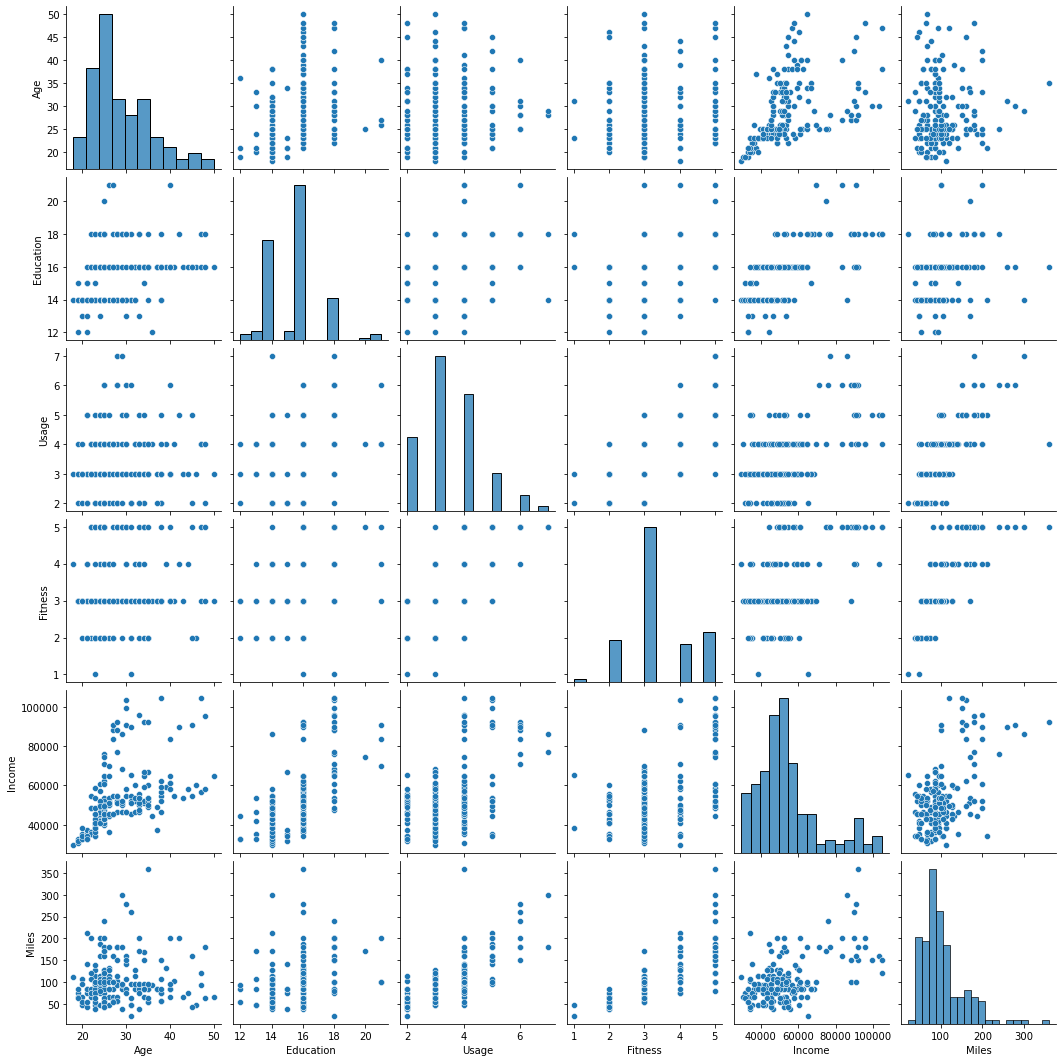

In [7]:
sns.pairplot(data)

<AxesSubplot:>

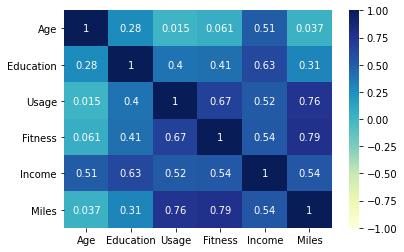

In [11]:
sns.heatmap(data.corr(), annot=True, cmap='YlGnBu', vmin=-1, vmax=1)

In [7]:
#to see a broad correlation among variables in this data set.
data.corr()

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


Observations:

1. Age has high correlation with Fitness and Income
2.Education also has high correlation with Income. It tells me that the more educated the customers are the higher their income.
3.There is a relatively high correlation between usage and miles expected to run. If the miles expected to run from a customer is high then likely high usage of the treadmill.
4. Other really high correlation include Miles and fitness.

### Let us now explore some of the variables with high correlation


**Age and Usage**

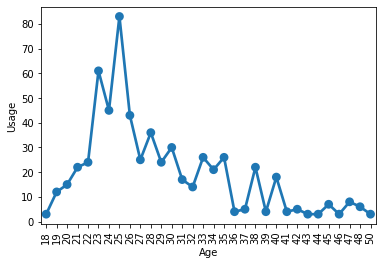

In [16]:
sns.pointplot(x='Age', y='Usage', data=data, estimator=sum, ci=None)
plt.xticks(rotation=90); 

**Usage and Income**

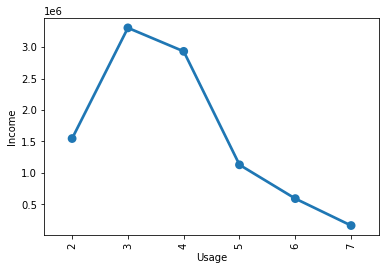

In [17]:
sns.pointplot(x='Usage', y='Income', data=data, estimator=sum, ci=None)
plt.xticks(rotation=90); 

**Age and Income**

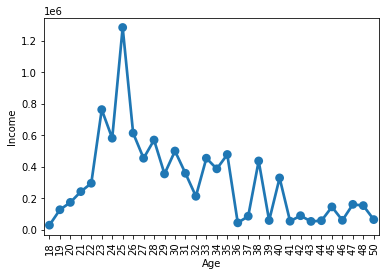

In [23]:
sns.pointplot(x='Age', y='Income', data=data, estimator=sum, ci=None)
plt.xticks(rotation=90);

**Observations**

1. I can deduce that most of the customers are of a younger age group and are high earners.
2. I can see that more higher earners are likely to use the treadmill products.
3. As customers get older, their income decreases and so does their usage.

<font color=darkblue>
    
* The plot displayed below is called as a Histogram
    
* The X-axis groups the observations from minimum to maximum along the axis on the basis of the discrete points or class intervals

* The Y-axis measures the frequency of occurance of observations for each discrete point or class interval.

Observations;
Using a histogram we are going to look at a variable and the frequency of occurence of that variable.


From this histogram it can be inferred that the most users of the gym products fall within the age range of 21-25years. 


# <span style="font-family: Arial; font-weight:bold;font-size:1.9em;color:#0e92ea"> Multivariate Analysis

In order to understand interactions between different fields in the dataset (or) finding interactions between variables more than 2

In this case We will illustrate the relationship between some key variables Age,Income, Marital status, product and gender

<AxesSubplot:xlabel='Age', ylabel='Income'>

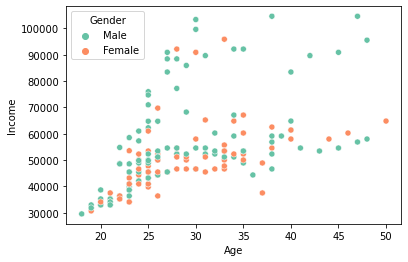

In [29]:
sns.scatterplot(data['Age'], data['Income'], hue=data['Gender'], palette='Set2') 

Observations;

It appears that younger people have less income
Males have more earning power than females

<AxesSubplot:xlabel='Income', ylabel='Usage'>

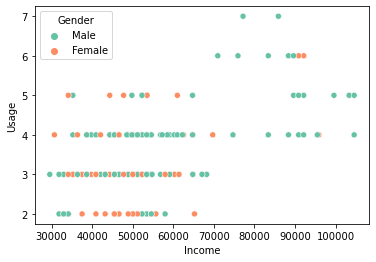

In [41]:
sns.scatterplot(data['Income'], data['Usage'], hue=data['Gender'], palette='Set2') 

Observations

most users are middle income earners and income does not really play a significant role in the rate of usage.

<AxesSubplot:xlabel='Usage', ylabel='Miles'>

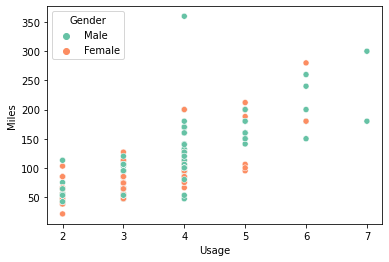

In [8]:
sns.scatterplot(data['Usage'], data['Miles'], hue=data['Gender'], palette='Set2') 

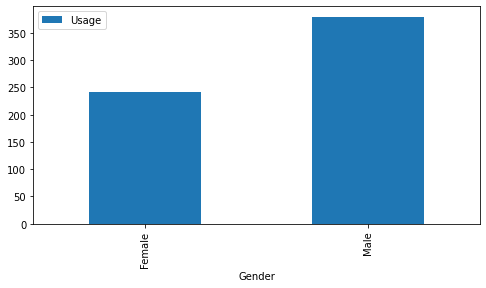

In [33]:
data.groupby(by=['Gender'])['Usage'].sum().reset_index().sort_values(['Usage']).tail(10).plot(x='Gender',y='Usage',kind='bar',
                                                                                                           figsize=(8,4))
plt.show()

**Observations**

- There seems to be more usage of the treadmill products by Males than Female customers

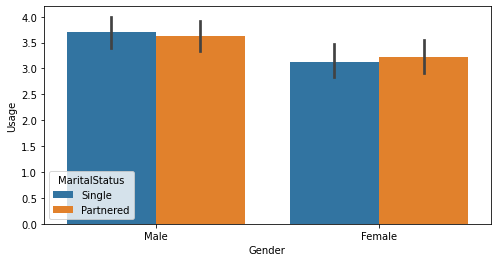

In [35]:
plt.figure(figsize=(8,4))
sns.barplot(data=data,x='Gender',y='Usage',hue='MaritalStatus')
plt.show()

**Observations**

1. I can tell from the illustrations above that more partnered females tend to use the treadmills more than their single counterparts
2. On the other hand it looks like more single men tend to have a higher rate of usage more than the partnered men.
3. In general the marital status of customers doesnt seem to play a significant shift in usage of the products

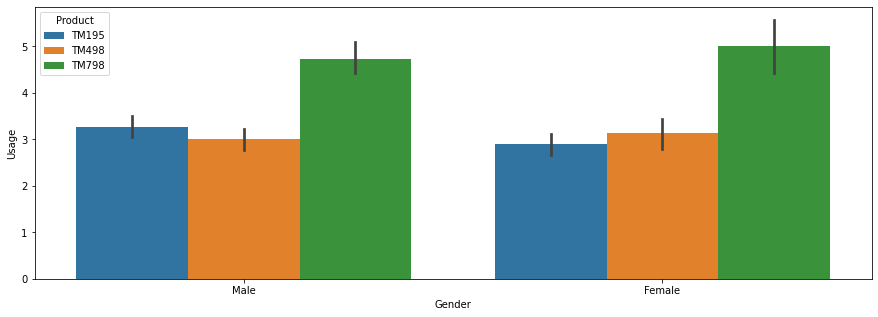

In [47]:
plt.figure(figsize=(15,5))
sns.barplot(data=data,x='Gender',y='Usage',hue='Product')
plt.show()

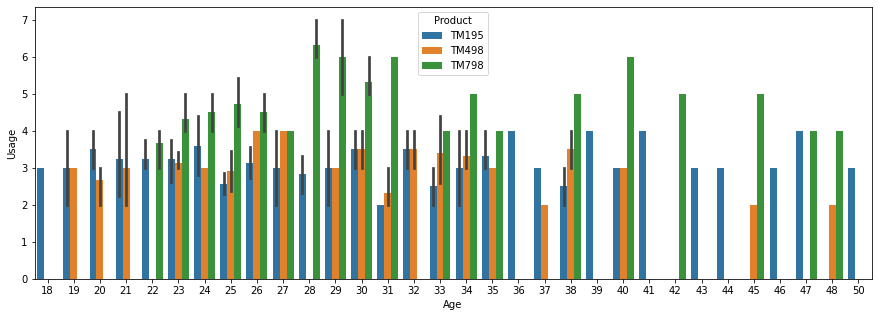

In [37]:
plt.figure(figsize=(15,5))
sns.barplot(data=data,x='Age',y='Usage',hue='Product')
plt.show()

**Observations**

1. It is Evident that Product TM798 is highly used and has the highest number of customers regardless of gender.
2. Its appears that there is equal amounts of patronage for both products TM195 & TM498 for both genders.

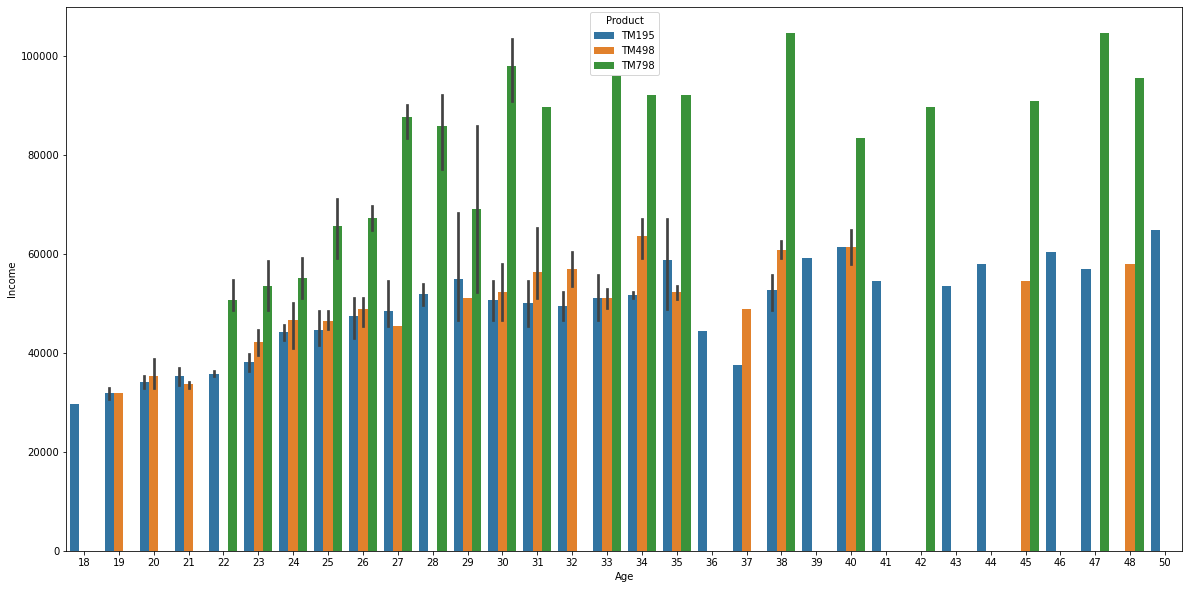

In [44]:
plt.figure(figsize=(20,10))
sns.barplot(data=data,x='Age',y='Income',hue='Product')
plt.show()

**Observations**

1. As observed in previous illustration TM798 is highly used across the board.
2. TM798 is more prevalently used among younger customers.
3. It can be infered that TM798 is more used as income rises.

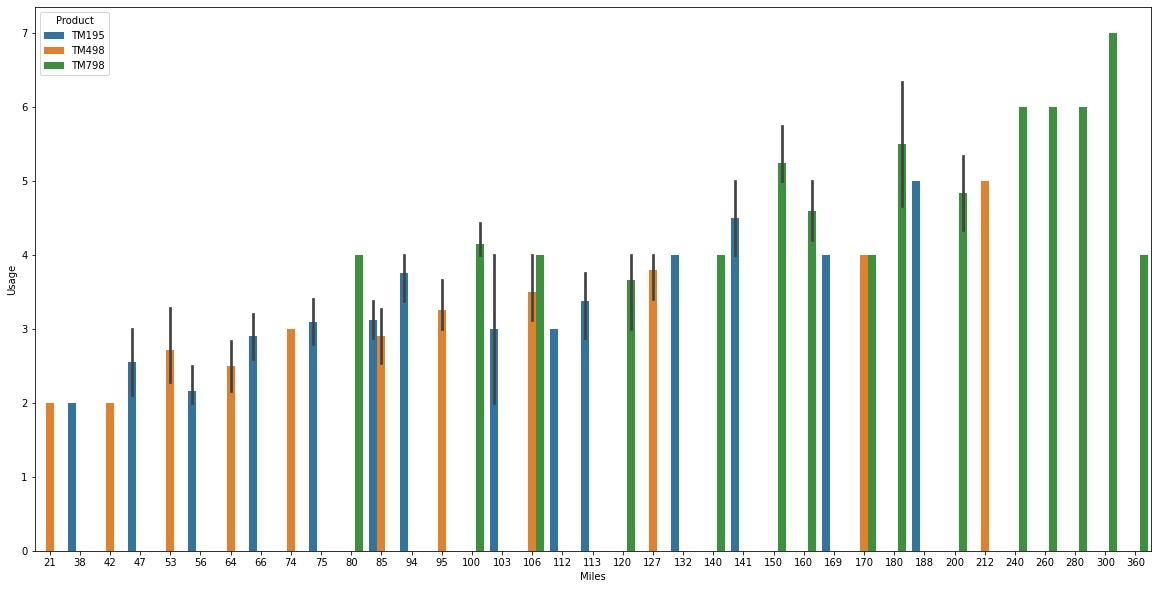

In [57]:
plt.figure(figsize=(20,10))
sns.barplot(data=data,x='Miles',y='Usage',hue='Product')
plt.show()

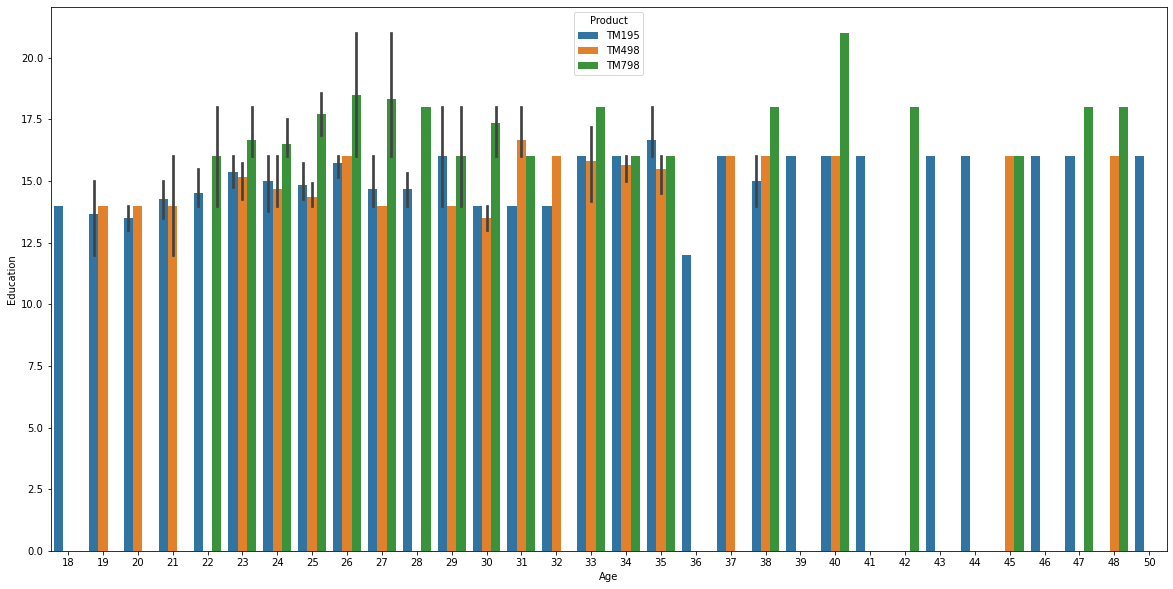

In [58]:
plt.figure(figsize=(20,10))
sns.barplot(data=data,x='Age',y='Education',hue='Product')
plt.show()

## Conclusions & Recommendations

1. TM798 is more prevalently used among customers which may be indicative of some factors like Income,Education.
2. It is Observed that there is a significant difference in the frequency of use TM195 and TM498 as compared to TM798.

**Recommendations**
1. More Marketing to be targeted at older customers.
2. More Marketing dollars targeted to spread awareness for product TM195 and TM498.
3. The most used product out the Trio is TM798 which suggests that there is ample opportunity for promotion of the other 2 products.
4. More younger users were recorded. It may be indicative of existence of  limiting factors for the older users such as design, ergonomics and pricing.
5. There seems to be a relatively high correlation between education and the highest used product (TM798). Suggesting opportunity for untargeted customers and a new potential market base.

